# <span style="color:red"> Dataset of one feature and its class belonging is given. Train a model which can predict its dataset</span>

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x1 = torch.rand(250, 2)*(-12)

In [3]:
y1 = torch.tensor([[0.] for features in x1])

In [4]:
x2 = torch.rand(250, 2)*(12)

In [5]:
y2 = torch.tensor([[1.] for features in x2])

In [6]:
x = torch.cat((x1, x2), dim=0)

In [7]:
y = torch.cat((y1, y2), dim=0)

In [8]:
DS = {'X': x, 'Y': y}

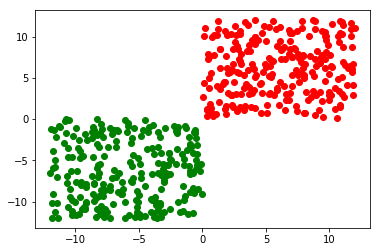

In [9]:
for x_, y_ in zip(DS['X'], DS['Y']):
    if y_==1.:
        plt.plot(x_[0], x_[1], 'ro')
    else:
        plt.plot(x_[0], x_[1], 'go')

### Description of some keyworks:
```
DS: dictionary of provided dataset x, y. DS['X'] is x, DS['Y'] is y.
LOSS: list of losses in epochs
```

# <span style="color:green"> Answer: </span>

## Custom dataset

In [10]:
from torch.utils.data.dataset import Dataset

class MyCustomDataset(Dataset):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return y.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [11]:
dataset = MyCustomDataset(DS['X'], DS['Y'])

## DataLoader

In [12]:
from torch.utils.data import DataLoader

batch_size = 8

train_loader = DataLoader(dataset, batch_size, shuffle=True)

# Model

In [13]:
class binary_classification(torch.nn.Module):
    
    def __init__(self, input_size, output_size, hidden_neuron_cnt):
        
        super(binary_classification, self).__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_neuron_cnt)
        self.act = torch.nn.Sigmoid()
        self.linear2 = torch.nn.Linear(hidden_neuron_cnt, output_size)

    def forward(self, x):
        
        out = self.linear1(x)
        out = self.act(out)
        out = self.linear2(out)
        out = self.act(out)
        return out

In [14]:
model = binary_classification(2, 1, 4)

# Loss

In [15]:
criterion = torch.nn.BCELoss() 

# Optimizer

In [16]:
optimizer = torch.optim.Adam(model.parameters(), lr=.01)

In [17]:
with torch.no_grad():
    y_pred = model(DS['X'])
    y_pred = torch.round(y_pred)

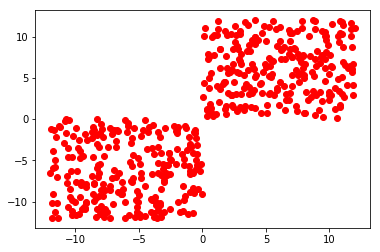

In [19]:
for x_, y_ in zip(DS['X'], y_pred):
    if y_==1.:
        plt.plot(x_[0], x_[1], 'ro')
    else:
        plt.plot(x_[0], x_[1], 'go')

In [20]:
LOSS = []
for epoch in range(50):
    sum_loss_in_batch = 0.
    for x, y in train_loader:
        y_hat = model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sum_loss_in_batch += loss.item()
        
    loss_in_epoch = sum_loss_in_batch/batch_size
    LOSS.append(loss_in_epoch)
    print(f"Epoch {epoch} Loss: {loss_in_epoch}")

Epoch 0 Loss: 4.180177975445986
Epoch 1 Loss: 0.06562566012144089
Epoch 2 Loss: 0.0651274174451828
Epoch 3 Loss: 0.06458696722984314
Epoch 4 Loss: 0.06401289999485016
Epoch 5 Loss: 0.0634123831987381
Epoch 6 Loss: 0.0627913698554039
Epoch 7 Loss: 0.06215493753552437
Epoch 8 Loss: 0.061507292091846466
Epoch 9 Loss: 0.06085199490189552
Epoch 10 Loss: 0.0601920485496521
Epoch 11 Loss: 0.05952998623251915
Epoch 12 Loss: 0.058867935091257095
Epoch 13 Loss: 0.0582076832652092
Epoch 14 Loss: 0.057550717145204544
Epoch 15 Loss: 0.056898295879364014
Epoch 16 Loss: 0.05625144764780998
Epoch 17 Loss: 0.055611032992601395
Epoch 18 Loss: 0.054977744817733765
Epoch 19 Loss: 0.054352156817913055
Epoch 20 Loss: 0.05373471975326538
Epoch 21 Loss: 0.0531257763504982
Epoch 22 Loss: 0.05252561718225479
Epoch 23 Loss: 0.05193443223834038
Epoch 24 Loss: 0.051352351903915405
Epoch 25 Loss: 0.05077946558594704
Epoch 26 Loss: 0.05021582171320915
Epoch 27 Loss: 0.04966141656041145
Epoch 28 Loss: 0.0491162240505

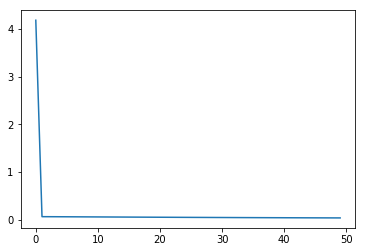

In [21]:
plt.plot(LOSS)

In [22]:
with torch.no_grad():
    y_pred = model(DS['X'])
    y_pred = torch.round(y_pred)

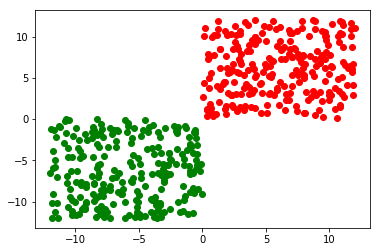

In [23]:
for x_, y_ in zip(DS['X'], y_pred):
    if y_==1.:
        plt.plot(x_[0], x_[1], 'ro')
    else:
        plt.plot(x_[0], x_[1], 'go')